In [46]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.svm import SVC

%matplotlib inline

In [47]:
digits = np.array([0,1,2,3,4,5,6,7,8,9])
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = digits.reshape(-1,1)
onehot_encoded = onehot_encoder.fit_transform(int_encoded) #Dummy Variables

In [48]:
onehot_encoded[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
#creating a list of train dataset tuple(image, image tag)
train_dict = []
with open('train_data.txt', 'r') as f:
    for line in f:
        x, y = line.split()
        y = int (y)
        t=(x,y)
        train_dict.append(t)

In [50]:
#creating a list of test dataset tuple(image, image tag)
test_dict = []
with open('test_data.txt', 'r') as f:
    for line in f:
        x, y = line.split()
        y = int (y)
        t=(x,y)
        test_dict.append(t)

In [51]:
# Defining a function to load dataset
def load_images_dataset(data_dict,onehot_encoded,digits):
    dataset = {}
    X=[]
    Y=[]
    for aTuple in data_dict:
        x = cv2.imread(aTuple[0]) 
        if aTuple[1] in digits :
            y = onehot_encoded[aTuple[1]] # get correct onehot encoded value
            X.append(x)
            Y.append(y)
    dataset = {'X': X ,'Y':Y}
    return dataset

In [52]:
train = load_images_dataset(train_dict,onehot_encoded,digits)

In [53]:
train_x=train['X']
train_y=train['Y']

In [54]:
train_y = np.array(train_y).astype(np.float32)

In [55]:
gau_train=[]
for i in range(0 , len(train_x)):
    filtered = cv2.GaussianBlur(train_x[i],(5,5),0)
    gray = cv2.cvtColor(filtered,cv2.COLOR_BGR2GRAY)
    gau_train.append(gray)

In [56]:
gau_train = np.array(gau_train).astype(np.float32)

In [57]:
gau_train.shape

(73257, 32, 32)

In [58]:
gau_train[0].shape

(32, 32)

In [59]:
m=[]
for i in range (0,len(gau_train)): 
    m.append(gau_train[i].reshape(-1))

In [60]:
train_x = m

In [61]:
train_x = np.array(train_x).astype(np.float32)

In [62]:
train_x.shape

(73257, 1024)

In [63]:
# Parameters
learning_rate = 1
training_epochs = 20

In [64]:
# Network Parameters
n_hidden_1 = 512 # 1st layer number of features
n_hidden_2 = 512 # 2nd layer number of features
n_input = 1024 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = len(train_x)

In [65]:
import tensorflow as tf
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [66]:
x.shape

TensorShape([Dimension(None), Dimension(1024)])

In [67]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [68]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [69]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [70]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [71]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [72]:
# Initializing the variables
init = tf.global_variables_initializer()

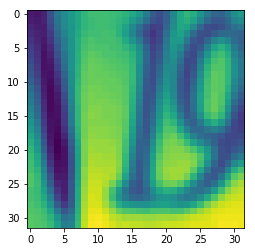

In [73]:
plt.imshow(train_x[0].reshape(32,32))

In [74]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    _, c = sess.run([optimizer, cost], feed_dict={x: train_x, y: train_y})

        # Compute average loss
    avg_cost = c

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=1338917.2500
Epoch: 2 cost=1991897600.0000
Epoch: 3 cost=965252864.0000
Epoch: 4 cost=48529488.0000
Epoch: 5 cost=27047282.0000
Epoch: 6 cost=1352175.7500
Epoch: 7 cost=311.6684
Epoch: 8 cost=248.1862
Epoch: 9 cost=170.0581
Epoch: 10 cost=107.5263
Epoch: 11 cost=59.6493
Epoch: 12 cost=32.4532
Epoch: 13 cost=12.4247
Epoch: 14 cost=8.6364
Epoch: 15 cost=7.2136
Epoch: 16 cost=7.0019
Epoch: 17 cost=9.7541
Epoch: 18 cost=5.4045
Epoch: 19 cost=5.0181
Epoch: 20 cost=7.6038
Model has completed 20 Epochs of Training


In [75]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [76]:
print(correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=bool)


In [77]:
correct_predictions = tf.cast(correct_predictions, "float")
print(correct_predictions[0])

Tensor("strided_slice_3:0", shape=(), dtype=float32)


In [78]:
accuracy = tf.reduce_mean(correct_predictions)
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [79]:
test = load_images_dataset(test_dict,onehot_encoded,digits)
test_x = test['X']
test_y = test['Y']

In [80]:
gau_test=[]
for i in range(0 , len(test_x)):
    filtered = cv2.GaussianBlur(test_x[i],(5,5),0)
    gray = cv2.cvtColor(filtered,cv2.COLOR_BGR2GRAY)
    gau_test.append(gray)

In [81]:
gau_test = np.array(gau_test).astype(np.float32)

In [82]:
gau_test.shape

(26032, 32, 32)

In [83]:
n=[]
for i in range (0,len(gau_test)): 
    n.append(gau_test[i].reshape(-1))

In [84]:
test_x = n

In [85]:
test_x = np.array(test_x).astype(np.float32)

In [86]:
test_x.shape

(26032, 1024)

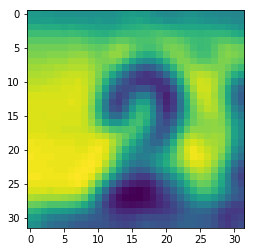

In [87]:
plt.imshow(test_x[1].reshape(32,32))

In [88]:
test_y = np.array(test_y).astype(np.float32)

In [89]:
test_y.shape

(26032, 10)

In [90]:
print("Accuracy:", accuracy.eval({x: test_x, y: test_y}))

Accuracy: 0.15938076
